## PYMC Laboratory

Welcome to the **PyMC Laboratory**. In this lab, we will explore the foundations and practical applications of **Bayesian inference** using the [PyMC](https://www.pymc.io/) probabilistic programming library in Python.

### 🔍 Objective

The goal of this laboratory is to understand how to:

- Define probabilistic models using Bayesian reasoning
- Assign prior distributions to parameters
- Incorporate observed data through likelihood functions
- Use **Markov Chain Monte Carlo (MCMC)** to approximate posterior distributions
- Evaluate convergence and diagnose sampling performance using **ArviZ**

### 🧪 What You'll Do

Throughout the lab, you will:

1. Implement simple Bayesian models (e.g. Beta-Binomial and Linear Regression)
2. Visualize model structure using `pm.model_to_graphviz()`
3. Sample from the posterior distribution using `pm.sample()`
4. Use ArviZ to:
   - Plot trace and posterior distributions
   - Calculate diagnostics such as R̂ (R-hat) and Effective Sample Size (ESS)
   - Visualize Highest Density Intervals (HDI)
   - Check for divergences and sampling quality

### 📦 Requirements

Make sure you have the following Python libraries installed:

```bash
conda install -c conda-forge pymc arviz matplotlib graphviz


## Modeling the Beta-Binomial Distribution in PyMC

In this section, we will model a **Beta-Binomial** process using PyMC.

### 🎯 Problem Setup

Imagine we conduct an experiment where 10 people are asked whether they prefer pineapple on pizza. Out of the 10 participants, **7 say yes**. We want to estimate the underlying probability $\theta$ that a person says "yes".

We place a **prior distribution** on $\theta$ using a **Beta distribution**, and model the observed data using a **Binomial likelihood**.

---

### 🧾 Model Specification

We use the following hierarchical structure:

- $\alpha, \beta \sim \text{HalfNormal}(10)$  
- $\theta \sim \text{Beta}(\alpha, \beta)$  
- $y \sim \text{Binomial}(n=10, p=\theta)$


This allows the model to learn the shape parameters of the Beta prior from the data.

---







In [2]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Step 1: Define the model with fixed prior parameters
with pm.Model() as beta_binom_fixed:
    theta = pm.Beta("theta", alpha=2, beta=2)  # Prior
    y_obs = pm.Binomial("y_obs", n=10, p=theta, observed=7)  # Likelihood

    # Step 2: Sample from the posterior
    idata = pm.sample(
    draws=10000,         # Number of posterior samples per chain
    tune=3000,          # Number of warm-up (burn-in) steps
    chains=4,           # Number of parallel MCMC chains
    cores=4,            # Use 4 CPU cores (one per chain)
    target_accept=0.9,  # Higher acceptance rate to reduce divergences
    return_inferencedata=True,
    random_seed=42
    )



WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 3_000 tune and 10_000 draw iterations (12_000 + 40_000 draws total) took 3 seconds.


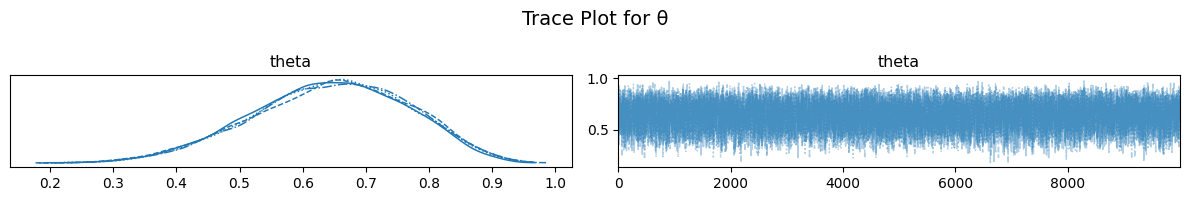

In [3]:
# Step 3: Diagnostics

## 3.1 Trace Plot
az.plot_trace(idata, var_names=["theta"])
plt.suptitle("Trace Plot for θ", fontsize=14)
plt.tight_layout()
plt.savefig("trace_fixed_beta_binom.png", dpi=300)
plt.show()




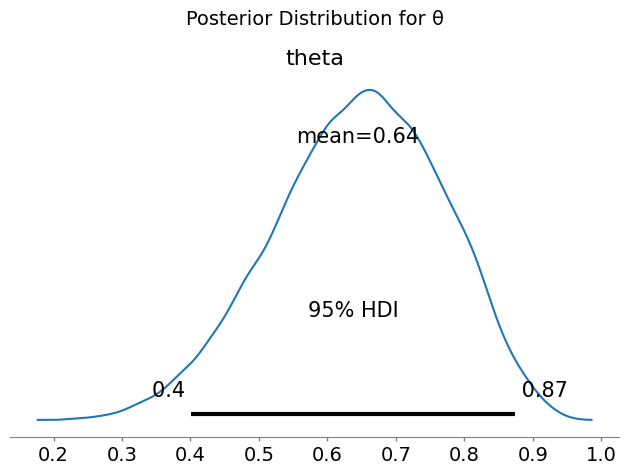

In [4]:
## 3.2 Posterior Plot
az.plot_posterior(idata, var_names=["theta"], hdi_prob=0.95)
plt.suptitle("Posterior Distribution for θ", fontsize=14)
plt.tight_layout()
plt.savefig("posterior_fixed_beta_binom.png", dpi=300)
plt.show()



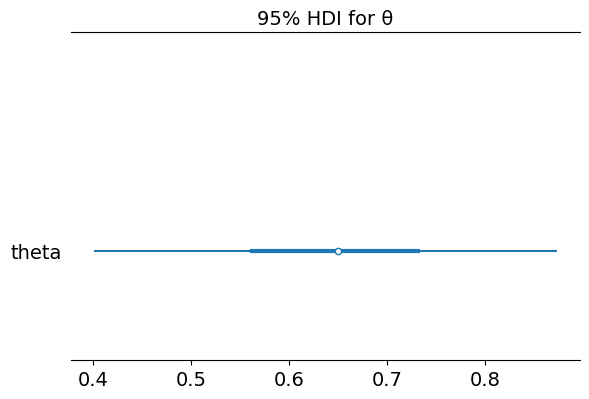

In [5]:
## 3.3 Forest Plot (with HDI)
az.plot_forest(idata, var_names=["theta"], combined=True, hdi_prob=0.95)
plt.title("95% HDI for θ", fontsize=14)
plt.tight_layout()
plt.savefig("forest_fixed_beta_binom.png", dpi=300)
plt.show()



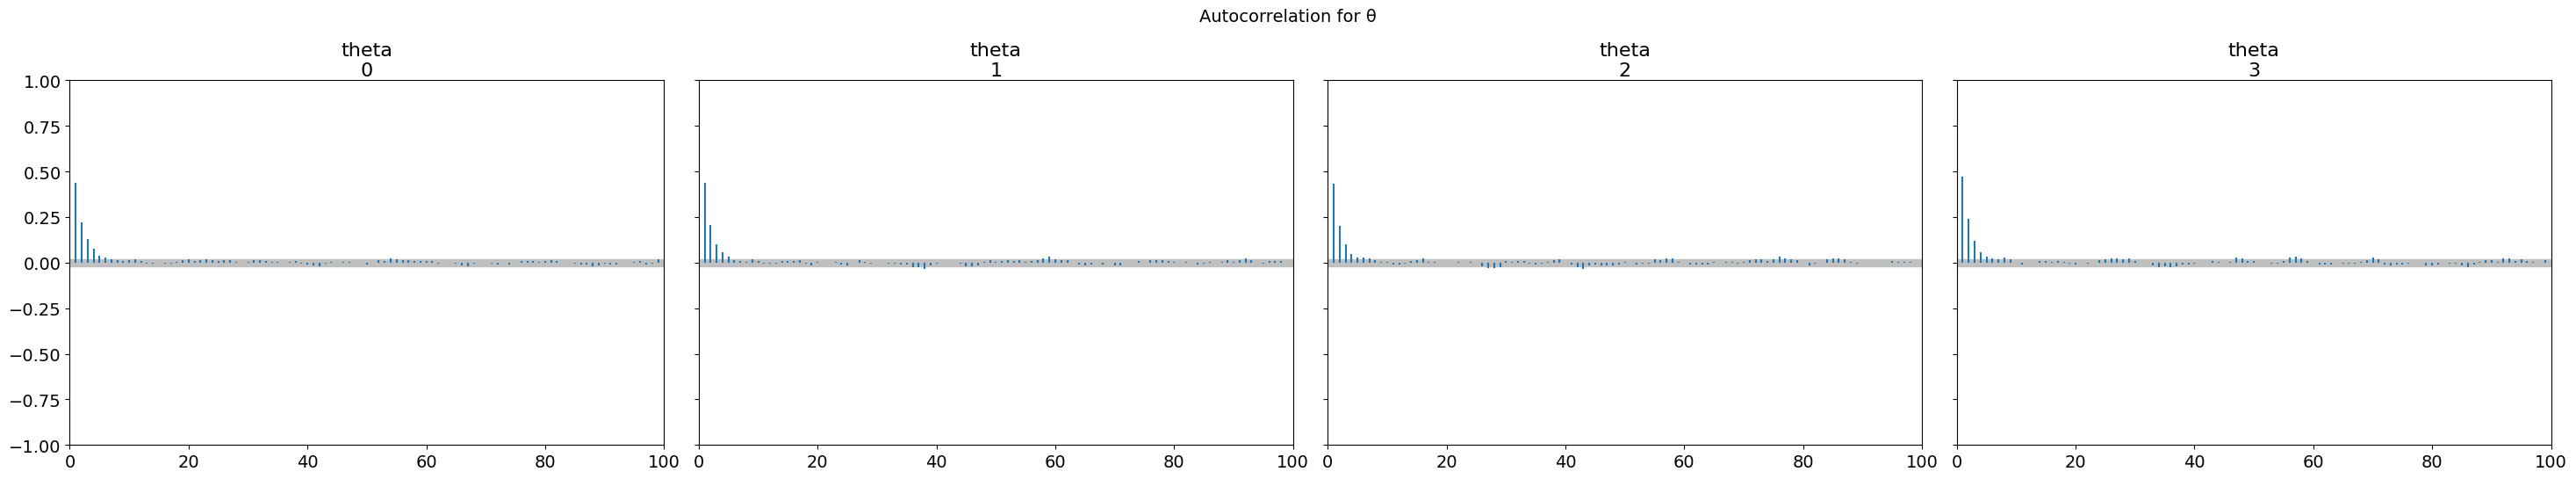

In [6]:
## 3.4 Autocorrelation Plot
az.plot_autocorr(idata, var_names=["theta"])
plt.suptitle("Autocorrelation for θ", fontsize=14)
plt.tight_layout()
plt.savefig("autocorr_fixed_beta_binom.png", dpi=300)
plt.show()



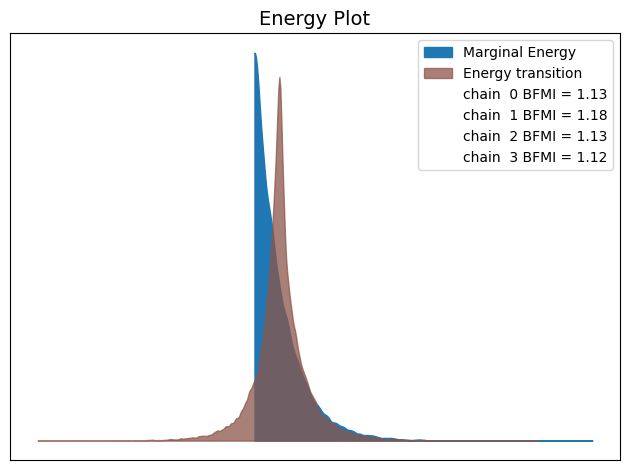

In [7]:
## 3.5 Energy Plot (diagnose divergences/leapfrog issues)
az.plot_energy(idata)
plt.title("Energy Plot", fontsize=14)
plt.tight_layout()
plt.savefig("energy_fixed_beta_binom.png", dpi=300)
plt.show()



In [8]:
# Step 4: Summary Table (R-hat, ESS, HDI, etc.)
summary = az.summary(idata, var_names=["theta"], round_to=3)
print(summary)
summary.to_csv("summary_fixed_beta_binom.csv")

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd   ess_bulk  \
theta  0.644  0.124   0.412    0.866      0.001    0.001  13720.044   

        ess_tail  r_hat  
theta  18477.233    1.0  


## 🔍 Posterior Summary for `theta`

The table below summarizes the posterior distribution of the parameter `theta` using MCMC samples:

| Parameter | Mean | SD   | 3% HDI | 97% HDI | MCSE (Mean) | MCSE (SD) | ESS (Bulk) | ESS (Tail) | R-hat |
|-----------|------|------|--------|---------|--------------|------------|-------------|-------------|--------|
| `theta`   | 0.644 | 0.124 | 0.412  | 0.866   | 0.001        | 0.001      | 13720.044    | 18477.233    | 1.000  |

### 🧠 Interpretation

- **Mean**: The posterior mean of $\theta$ is **0.644**, which reflects the central estimate based on the data.
- **SD**: The standard deviation of the posterior is **0.124**, indicating moderate uncertainty.
- **HDI (3%–97%)**: The 94% Highest Density Interval (HDI) ranges from **0.412 to 0.866**, representing the most credible values for $\theta$.
- **MCSE**: The Monte Carlo Standard Errors are **very small** (0.001), indicating reliable sampling.
- **ESS (Effective Sample Size)**:
  - **Bulk ESS**: 13,720 — indicates that the MCMC chains explored the bulk of the posterior effectively.
  - **Tail ESS**: 18,477 — shows reliable estimation in the distribution’s tails.
- **R-hat**: $\hat{R} = 1.0$ — perfect convergence. All chains mixed well and sampled from the same distribution.

✅ Overall, the diagnostics indicate a **high-quality and converged posterior** for the parameter $\theta$.


## 📈 Bayesian Linear Regression in PyMC

In this section, we will build and analyze a **Bayesian linear regression model** using PyMC.

### 🎯 Objective

We aim to estimate the relationship between a predictor variable `x` and a response variable `y`, while accounting for uncertainty in both the slope and the intercept of the regression line.

---

### 🧾 Model Specification

We assume the following generative model:

- $ \alpha \sim \mathcal{N}(0, 10) $  (intercept)
- $ \beta \sim \mathcal{N}(0, 10) $  (slope)
- $ \sigma \sim \text{HalfNormal}(1) $  (observation noise)
- $ \mu = \alpha + \beta \cdot x $  (linear mean)
- $ y \sim \mathcal{N}(\mu, \sigma) $  (observed outcomes)

This model assumes that the relationship between `x` and `y` is linear, and that `y` is normally distributed around the regression line with standard deviation $\sigma$.

---

### 🔢 Implementation Steps

We will:

1. Simulate or load a dataset
2. Define the linear regression model in PyMC
3. Perform posterior sampling using MCMC
4. Evaluate the model using diagnostic tools (trace plots, posterior, R-hat, ESS)
5. Visualize the posterior predictive regression lines

Let’s begin by simulating the data and specifying the model.


In [9]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Step 1: Simulate data
np.random.seed(42)
n = 100
x = np.linspace(0, 10, n)
true_alpha = 1.5
true_beta = 2.0
true_sigma = 1.0

y = true_alpha + true_beta * x + np.random.normal(0, true_sigma, size=n)

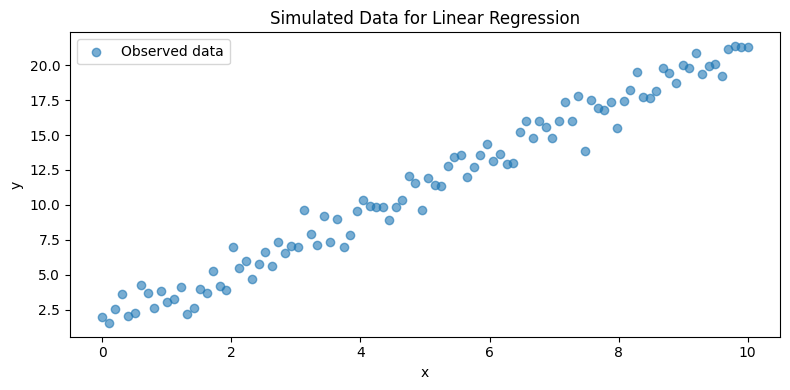

In [10]:
# Step 2: Plot the data
plt.figure(figsize=(8, 4))
plt.scatter(x, y, label='Observed data', alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simulated Data for Linear Regression")
plt.legend()
plt.tight_layout()
plt.savefig("simulated_data.png", dpi=300)
plt.show()




In [11]:
# Step 3: Define the Bayesian linear regression model
with pm.Model() as linear_model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=1)

    mu = alpha + beta * x

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # Step 4: Sample from the posterior
    idata = pm.sample(
        draws=1000,
        tune=1000,
        chains=4,
        cores=4,
        target_accept=0.9,
        return_inferencedata=True,
        random_seed=42
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


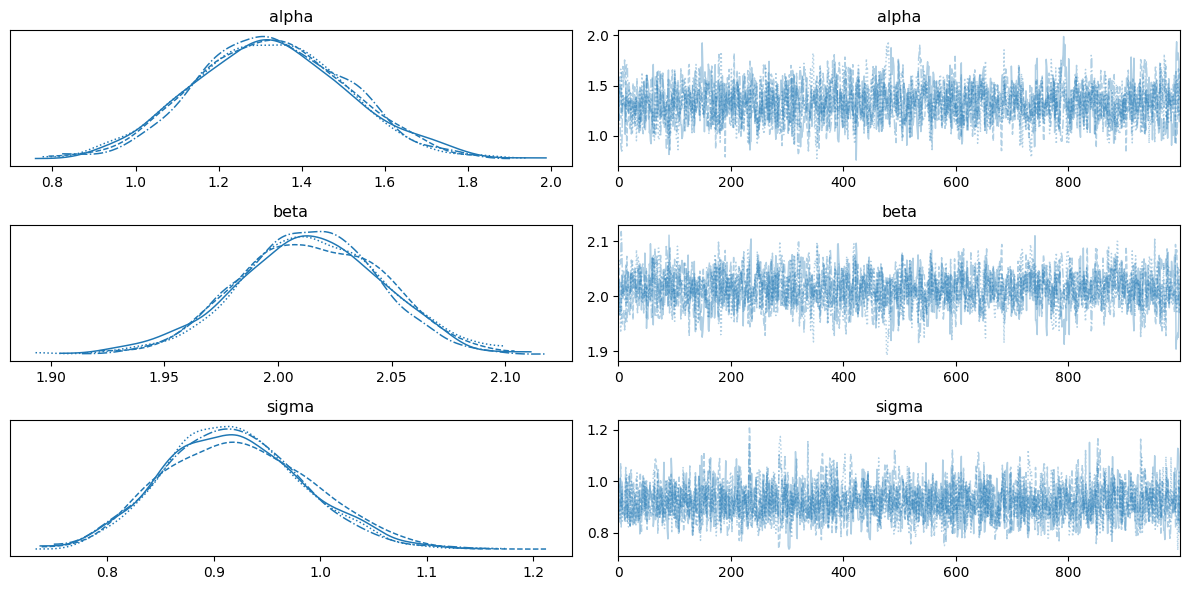

In [12]:
# Trace plot
az.plot_trace(idata, var_names=["alpha", "beta", "sigma"])
plt.tight_layout()
plt.savefig("linear_regression_trace.png", dpi=300)
plt.show()

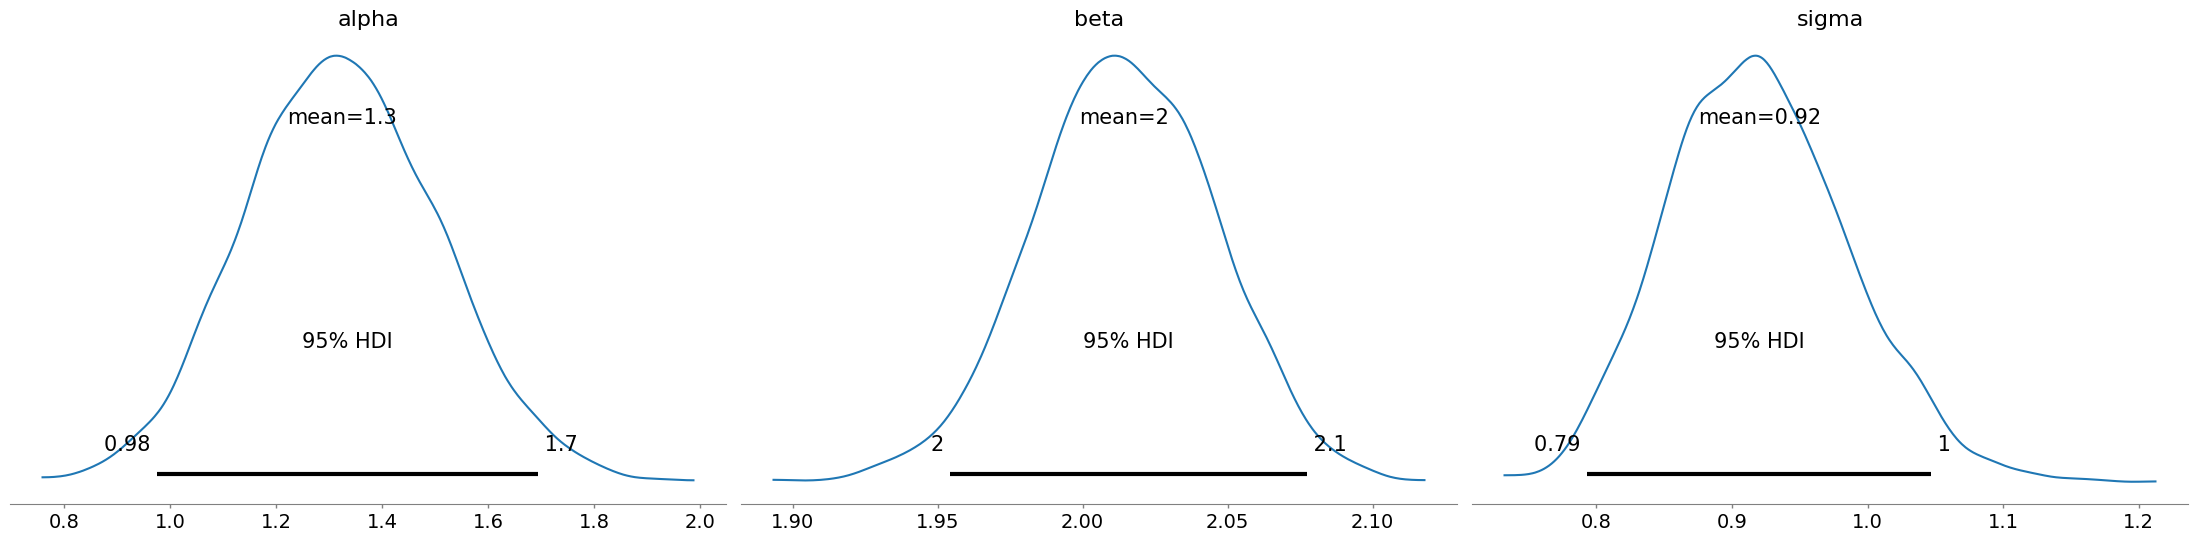

In [13]:
# Posterior plots
az.plot_posterior(idata, var_names=["alpha", "beta", "sigma"], hdi_prob=0.95)
plt.tight_layout()
plt.savefig("linear_regression_posterior.png", dpi=300)
plt.show()

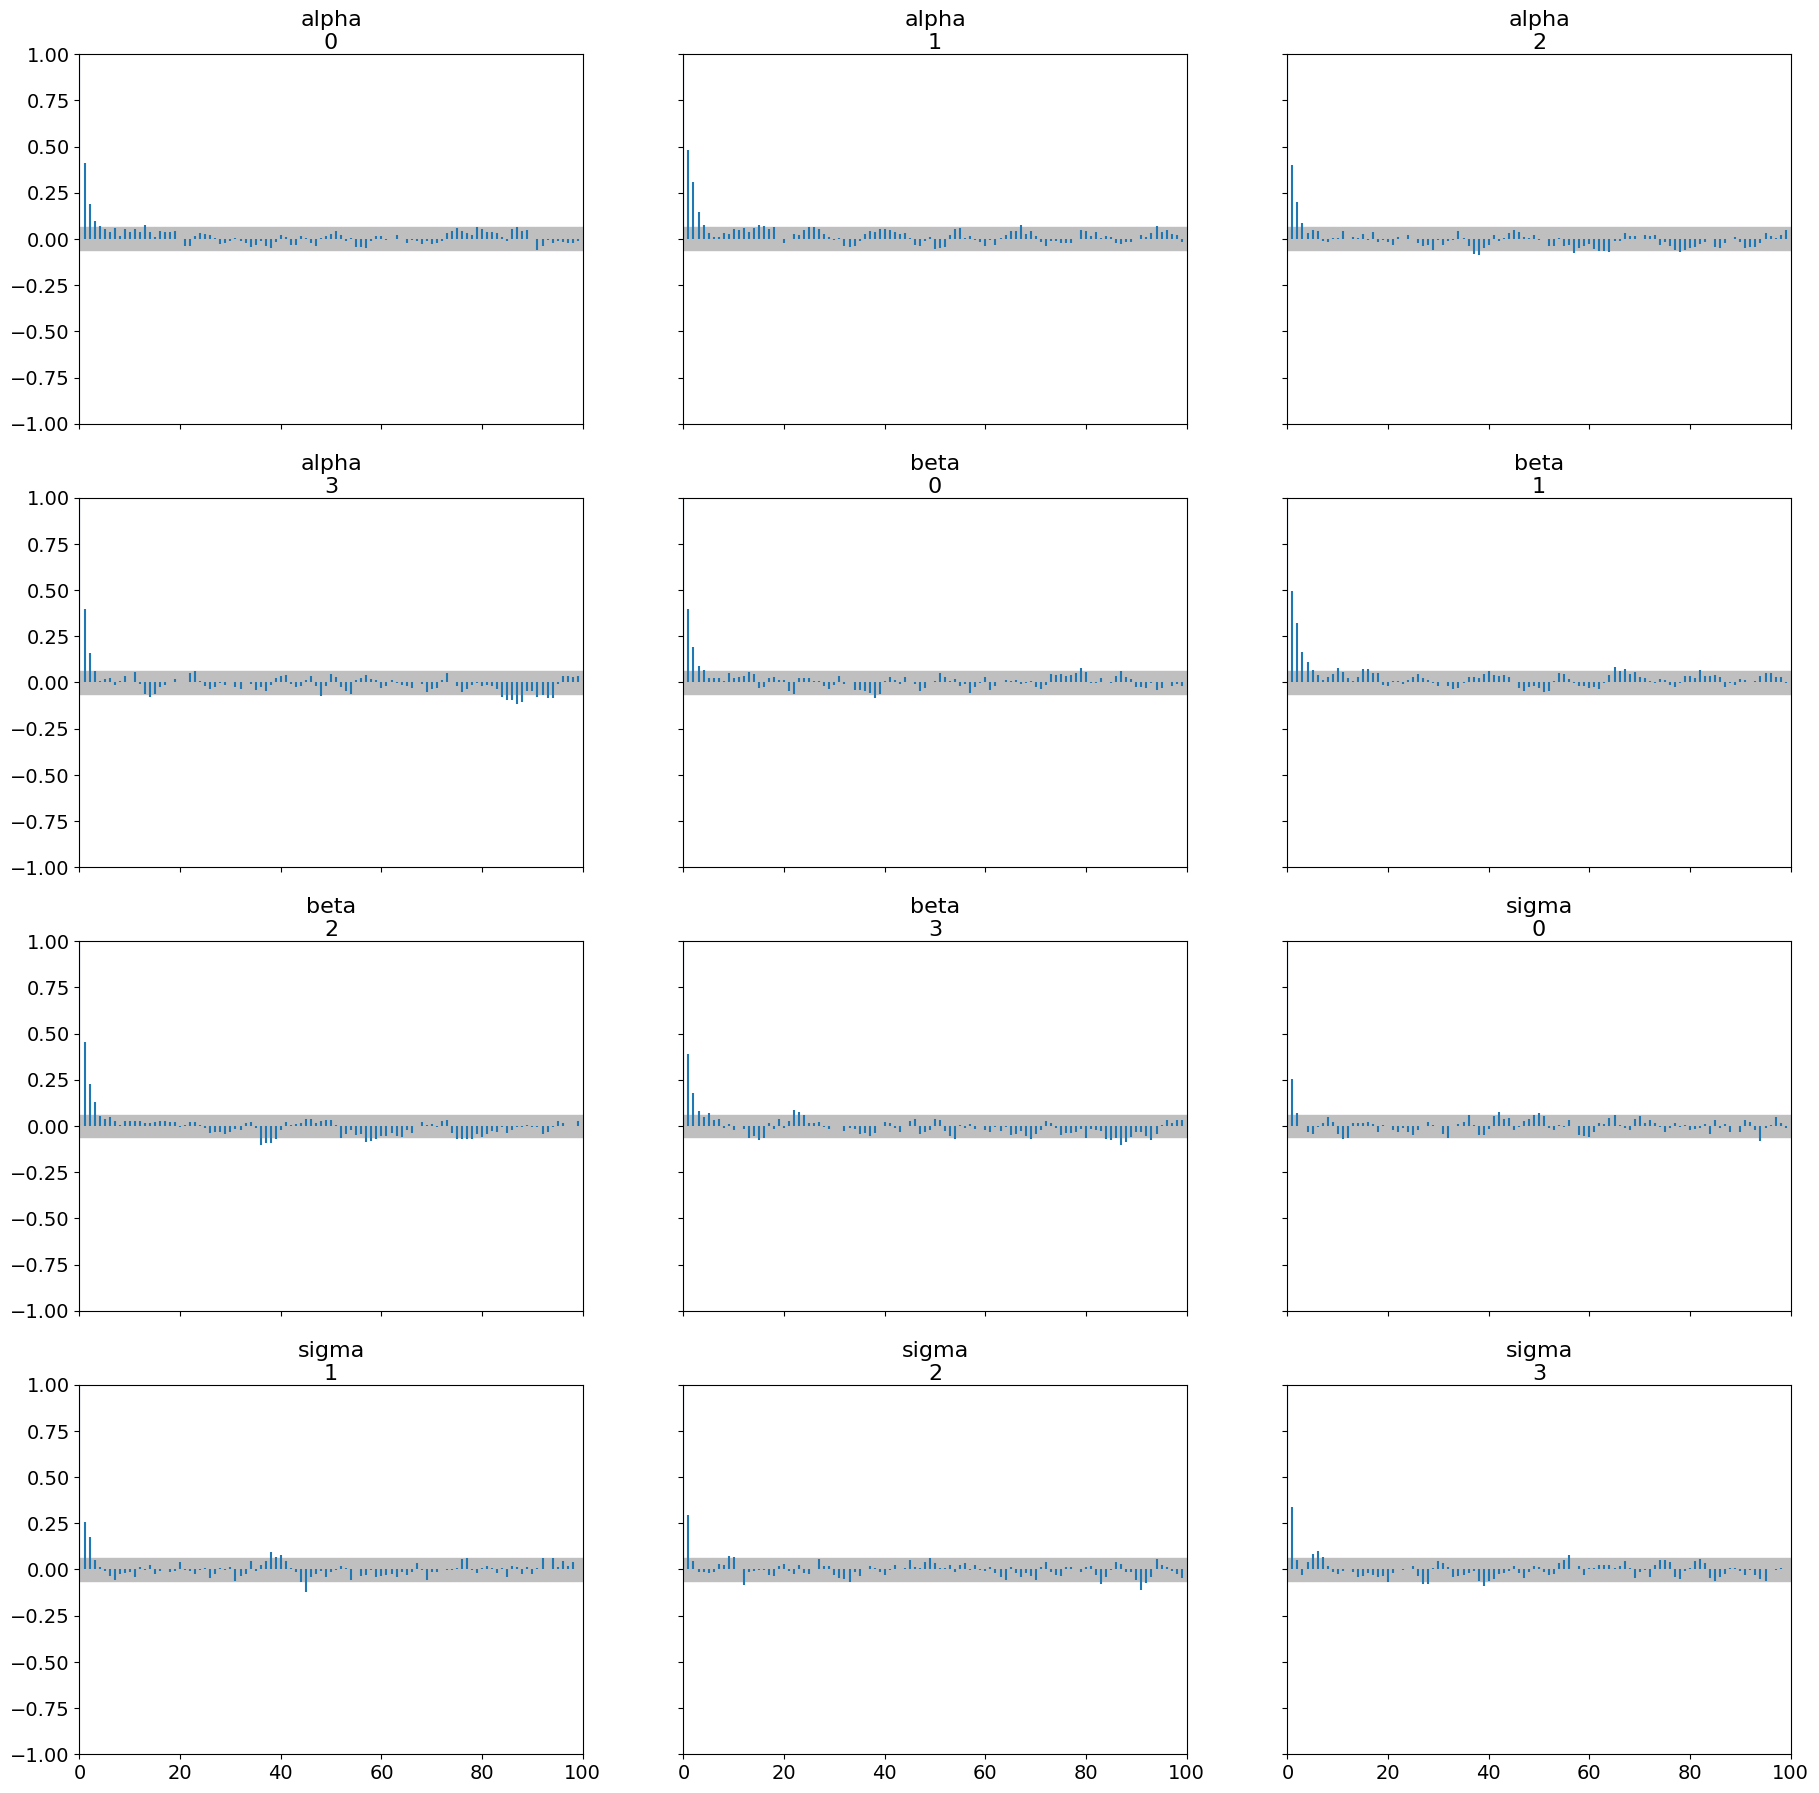

In [14]:
az.plot_autocorr(idata, var_names=["alpha", "beta", "sigma"])
plt.savefig("autocorr_linear_regression.png")


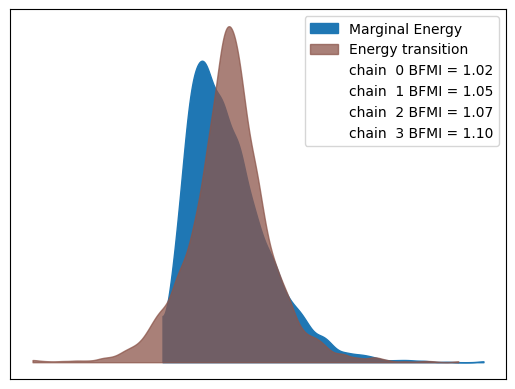

In [15]:
az.plot_energy(idata)
plt.savefig("energy_linear_regression.png")



In [25]:
# Summary table
summary = az.summary(idata, var_names=["alpha", "beta", "sigma"], round_to=3)
print(summary)
summary.to_csv("linear_regression_summary.csv")

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  1.325  0.183   1.010    1.696      0.005    0.004  1278.690  1465.097   
beta   2.014  0.032   1.958    2.076      0.001    0.001  1238.438  1391.586   
sigma  0.920  0.067   0.801    1.047      0.001    0.001  2324.454  1945.853   

       r_hat  
alpha  1.001  
beta   1.001  
sigma  1.002  


## 📊 Posterior Summary: Bayesian Linear Regression

After fitting the Bayesian linear regression model, we obtain the following posterior estimates:

| Parameter | Mean  | SD    | 3% HDI | 97% HDI | MCSE (Mean) | MCSE (SD) | ESS (Bulk) | ESS (Tail) | R-hat |
|-----------|-------|-------|--------|---------|--------------|------------|-------------|-------------|--------|
| `alpha`   | 1.325 | 0.183 | 1.010  | 1.696   | 0.005        | 0.004      | 1278.69      | 1465.10      | 1.001  |
| `beta`    | 2.014 | 0.032 | 1.958  | 2.076   | 0.001        | 0.001      | 1238.44      | 1391.59      | 1.001  |
| `sigma`   | 0.920 | 0.067 | 0.801  | 1.047   | 0.001        | 0.001      | 2324.45      | 1945.85      | 1.002  |

---

### 🧠 Interpretation

- The slope (`beta`) and intercept (`alpha`) are close to the true values used in the simulation.
- The noise (`sigma`) is also well estimated.
- The HDIs represent the 94% highest density intervals — the most credible parameter ranges.

---

### 📏 Diagnostic Metrics

- **Monte Carlo Standard Error (MCSE)** values are very low → estimates are reliable.
- **$\hat{R}$ values are ≈ 1.0** → all chains converged properly.
- **ESS (Effective Sample Size)** is high in both bulk and tail regions, which means posterior summaries (mean, intervals) are robust.

---

### 🔄 Bulk vs. Tail ESS

| Term        | Meaning |
|-------------|---------|
| **ESS Bulk** | Measures how well the sampler explores the **center of the posterior** — affects accuracy of means and variances. |
| **ESS Tail** | Measures sampling quality in the **tails of the distribution** — affects accuracy of HDIs and quantiles. |

✅ Both are high → posterior statistics and intervals are trustworthy.

---

## 🔁 Autocorrelation Plot

Autocorrelation measures the similarity between successive samples. If the autocorrelation is high, the sampler is not exploring the posterior efficiently.

In a well-mixed MCMC:

- Lag-0 should be 1 (by definition)
- Lags beyond 0 should drop quickly to 0

![Autocorrelation](autocorr_linear_regression.png)

✅ In this case, autocorrelation is low — effective sample size is high and mixing is good.

---

## ⚡ Energy Plot

The energy plot helps detect **divergences** and **inefficiencies** in the NUTS sampler.

- Ideally, the distribution of energies should be unimodal and smooth.
- Divergences or energy gaps may indicate that reparameterization is needed or `target_accept` should be increased.

![Energy Plot](energy_linear_regression.png)

✅ This plot shows smooth energy behavior with **no divergent transitions** → good geometry and tuning.

---

## ✅ Conclusion

All convergence and sampling diagnostics (trace, R-hat, ESS, autocorrelation, energy) indicate that the posterior results are valid and stable.

The model has recovered the true parameters effectively and provides meaningful uncertainty quantification.
